# PRODIGY INTERNSHIP

## TASK 03 - Build a Decision Tree Classifier

Build a Decision Tree Classifier to predict whether a customer will purchase a product based on demographic and behavioral data.

### Importing Libraries

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### Load Dataset

In [32]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Encode Categorical Vairables

In [11]:
df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

### Features & Target

In [14]:
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

### Train/Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Model

In [20]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Evaluation

In [25]:
y_pred = clf.predict(X_test)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 88.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2055
           1       0.74      0.47      0.57       411

    accuracy                           0.88      2466
   macro avg       0.82      0.72      0.75      2466
weighted avg       0.87      0.88      0.87      2466



### Decision Tree Visualization

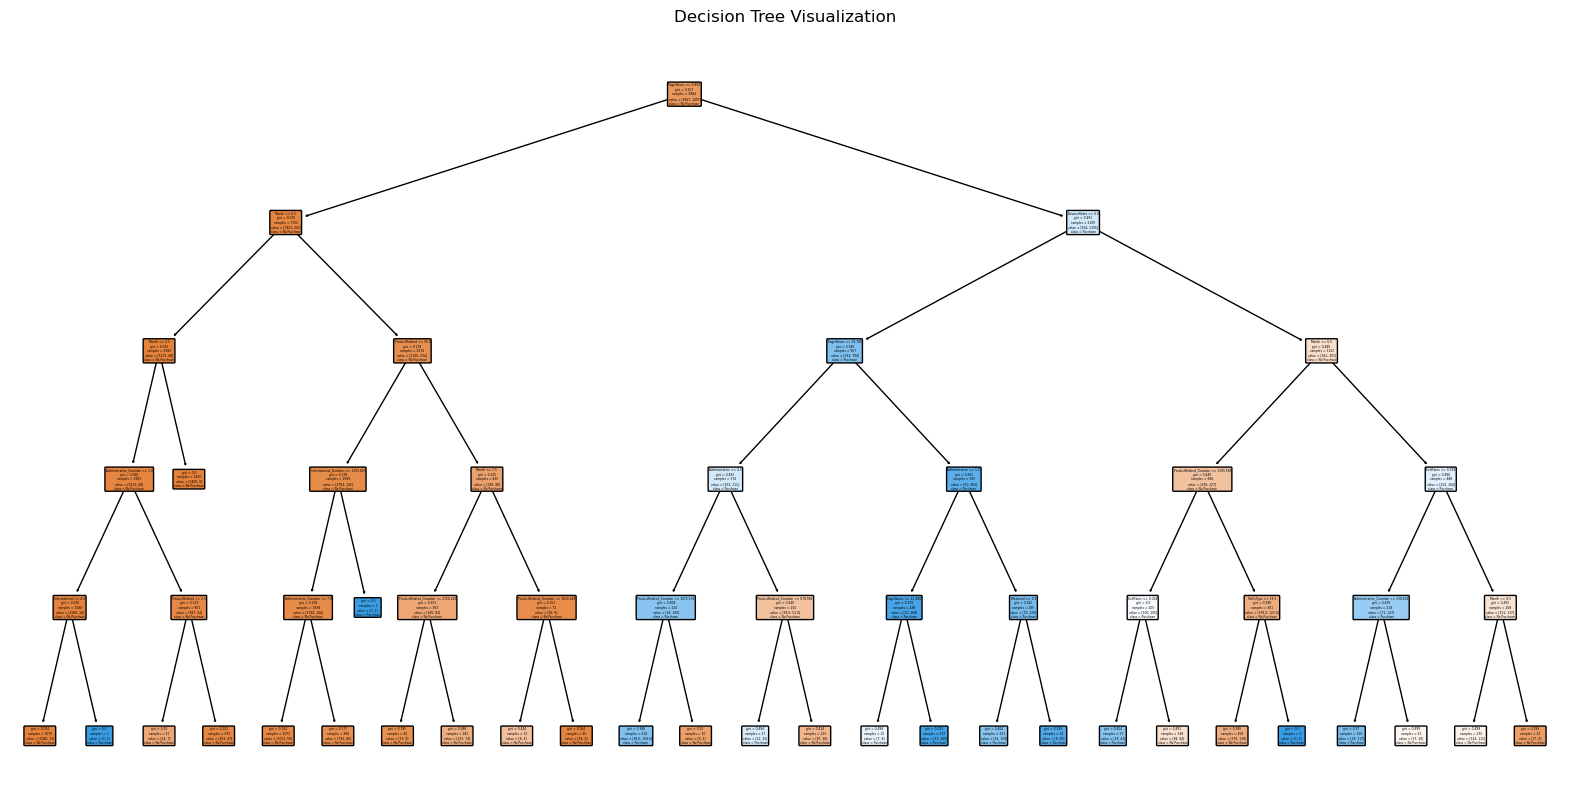

In [29]:
plt.figure(figsize=(20, 10))  # You can adjust the size
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['No Purchase', 'Purchase'], 
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()